# Problem Statement

We came across a Straits Time article that states that almost 9 in 10 Singaporeans reported feeling stressed in 2023, and 16 per cent said they felt that the stress was "not manageable", according to a new study by a global health firm.

However, based on UN World Happiness Report 2024, Singapore was crowned the happiest country in Asia for the second year in the row and ranked 30th globally. Curious about how we achieved this even with our fast-paced lifestyle and stressful environment, we decided to explore further.

From the UN World Happiness Report 2024, there are 9 factors that affects our overall happiness:

1. Life Ladder

2. Log GDP per capita

3. Social Support

4. Healthy Life expectancy at birth

5. Freedom to make life choices 

6. Generosity

7. Perceptions of corruption

8. Positive affect

9. Negative affect 

Our project and models will be narrowed down into 5 variables that affects overall happiness the most and eventually find the most important factor in predicting overall happiness in the country.

In [1]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sb
#import xgboost as xgb

In [2]:
!pip install xlrd>=2.0.1
import pandas as pd
df = pd.read_excel('DataForTable2.1.xls', sheet_name = 'Sheet1', header = 0)
df.head()


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


## Variable Description

Description of the data can be found here: https://happiness-report.s3.amazonaws.com/2024/Ch2+Appendix.pdf

Country Name: Name of Country that was measured in this survey

Year: Year where data was measured [2005-2023]

Life Ladder: Cantril Life Ladder, or Life Ladder as described in this dataset measures the subjective well-being of an individual. It is measured from a scale from 0 to 10, with 10 being that the person feel that he or she is at the best possible life and 0 being the worst possible life.

Log GDP per capita: Logarithmic value of the GDP per capita measured in terms of a constant 2017 international price from the World Development Indicators.

Social Support:  national average of the binary responses (either 0 or 1) to the GWP question 

- “If you were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?”

Freedom to make life choices:  The national average of responses to the GWP question 

- “Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?”

Healthy life expectancy at birth: represents the average number of years a person is expected to live in good health. 

Generosity: residual of regressing national average of response to the GWP question on GDP per capita.

- “Have you donated money to a charity in the past month?” 

Corruption perception:  derived from the average of survey responses on perceived government and business corruption

-  “Is corruption widespread throughout the government or not” 

- “Is corruption widespread within businesses or not?”

Positive affect: It is an average of the three positive affect measures such as laugh, enjoyment and doing interesting things. They are acquired through the responses to the following three questions.  

- “Did you smile or laugh a lot yesterday?”, and “Did you experience the following
feelings during A LOT OF THE DAY yesterday?"

-  How about Enjoyment?”

- “Did you learn or do something interesting yesterday?”

Negative affect: It is an average of the three negative affect measures such as worry, sadness and anger. They are acquire through the responses to the following questions 

- “Did you experience the following feelings during A LOT OF THE DAY yesterday?"

- How about Worry?

- Did you experience the following feelings during A LOT
OF THE DAY yesterday? 

- How about Sadness?

- “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?”

Institutional trust: quantified as the first principal component of confidence in the government, judicial system, election honesty, police force, and perceived business corruption. A binary measure (0 or 1) categorises countries into high or low trust based on the 75th percentile of the global distribution.

# Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


Based on the data description, we can see that the variable year is classified wrongly. So we changed it to a categorical data

In [4]:
df["year"] = df["year"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Country name                      2363 non-null   object  
 1   year                              2363 non-null   category
 2   Life Ladder                       2363 non-null   float64 
 3   Log GDP per capita                2335 non-null   float64 
 4   Social support                    2350 non-null   float64 
 5   Healthy life expectancy at birth  2300 non-null   float64 
 6   Freedom to make life choices      2327 non-null   float64 
 7   Generosity                        2282 non-null   float64 
 8   Perceptions of corruption         2238 non-null   float64 
 9   Positive affect                   2339 non-null   float64 
 10  Negative affect                   2347 non-null   float64 
dtypes: category(1), float64(9), object(1)
memory usage: 187.

Now, the data is classified correctly

In [5]:
df.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,5.483562,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,1.125523,1.152062,0.121211,6.842644,0.139366,0.161386,0.184871,0.106249,0.087133
min,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,4.646750,8.506165,0.743811,59.195001,0.660706,-0.111940,0.686784,0.571977,0.208559
50%,5.448725,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,6.323592,10.392974,0.903779,68.552502,0.861740,0.093569,0.867557,0.737262,0.326211
max,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


Other than year and country name, we can see that the rest of the variables are of numerical data type. There is are 2363 datasets to deal with. The mean of Social support, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect are very low (less than 1). Looking further into the description of the data, we can see that these data arises from binary questions with 0 or 1, so it makes sense for the mean of these datasets to be low.

Moving on, we will be dealing with the null values in the data set. We need to have a rough understanding to the count of null values to determine the data quality. A high count of 'null' values highlights a significant issue in data collection process. 

In [6]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

Given that the count is not too significant in comparison to our sample size, we have decided to use 'Median' as a replacement due to several reasons. As compared to 'Mean', Median is more likely to preserve the underlying distribution without skewing to the outliers. Furthermore, it can preserve the integrity of the dataset for analysis where measure of central tendency is crucial. 

In [7]:
df.fillna(value=df.select_dtypes(include=['float64', 'int64']).median(), inplace=True)
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


Now that the data is cleaned, we have decided to extract the relevant inputs into a new variable called cleanData. The relevant variables are everything except for Country name and year as we believe that the year and name of the country would not have any effect in the happiness of a country.

In [8]:
cleanData = df[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']]
cleanData

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...
2358,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


# Exploratory Data Analysis

To see how the relationship between each variables, we performed a correlation test by visualizing these inputs on a heatmap as shown below.

<Axes: >

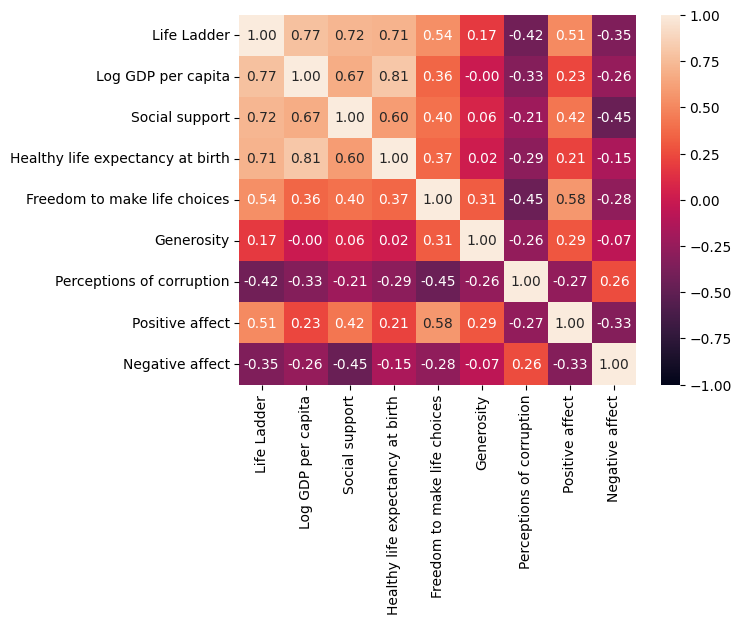

In [9]:
import seaborn as sb
sb.heatmap(cleanData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")


We can see that the variables have the strongest to the lowest correlation against Life Ladder.

1. Log GDP per capita

2. Social Support

3. Health life Expectancy at Birth

4. Freedom to make life choices

5. Positive Affect

6.  Perceptions of Corruption

7. Negative Affect

8. Generosity

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Prepare the data
X = cleanData.drop('Life Ladder', axis=1)
y = cleanData['Life Ladder']

# Initialize the model
model = RandomForestRegressor()

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,Log GDP per capita,0.571933
6,Positive affect,0.132487
2,Healthy life expectancy at birth,0.117541
1,Social support,0.064953
3,Freedom to make life choices,0.031666
7,Negative affect,0.029466
5,Perceptions of corruption,0.028421
4,Generosity,0.023534


Hence, based on our criteria for selecting variables with an absolute correlation value of 0.5 or higher and evaluating feature importance through a Random Forest Regressor, we will be focusing on the following variables: 

- Log GDP per capita

- Social Support 

- Healthy life expectancy at birth

- Freedom to make life choices

- Positive affect

These variables have demonstrated both statistical significance and predictive relevance in relation to the Life Ladder score, and will be the focus of our in-depth analysis.

In [11]:
cleanData2 = df[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices','Positive affect']]
cleanData2

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Positive affect
0,3.723590,7.350416,0.450662,50.500000,0.718114,0.414297
1,4.401778,7.508646,0.552308,50.799999,0.678896,0.481421
2,4.758381,7.613900,0.539075,51.099998,0.600127,0.516907
3,3.831719,7.581259,0.521104,51.400002,0.495901,0.479835
4,3.782938,7.660506,0.520637,51.700001,0.530935,0.613513
...,...,...,...,...,...,...
2358,2.693523,7.697755,0.759162,53.099998,0.631908,0.658434
2359,3.159802,7.596050,0.717243,53.575001,0.643303,0.660658
2360,3.154578,7.656878,0.685151,54.049999,0.667636,0.609917
2361,3.296220,7.670073,0.666172,54.525002,0.651987,0.640609


Next, we will plot each individual box plot, histogram and violin plot for each variable and analyze each data separately.

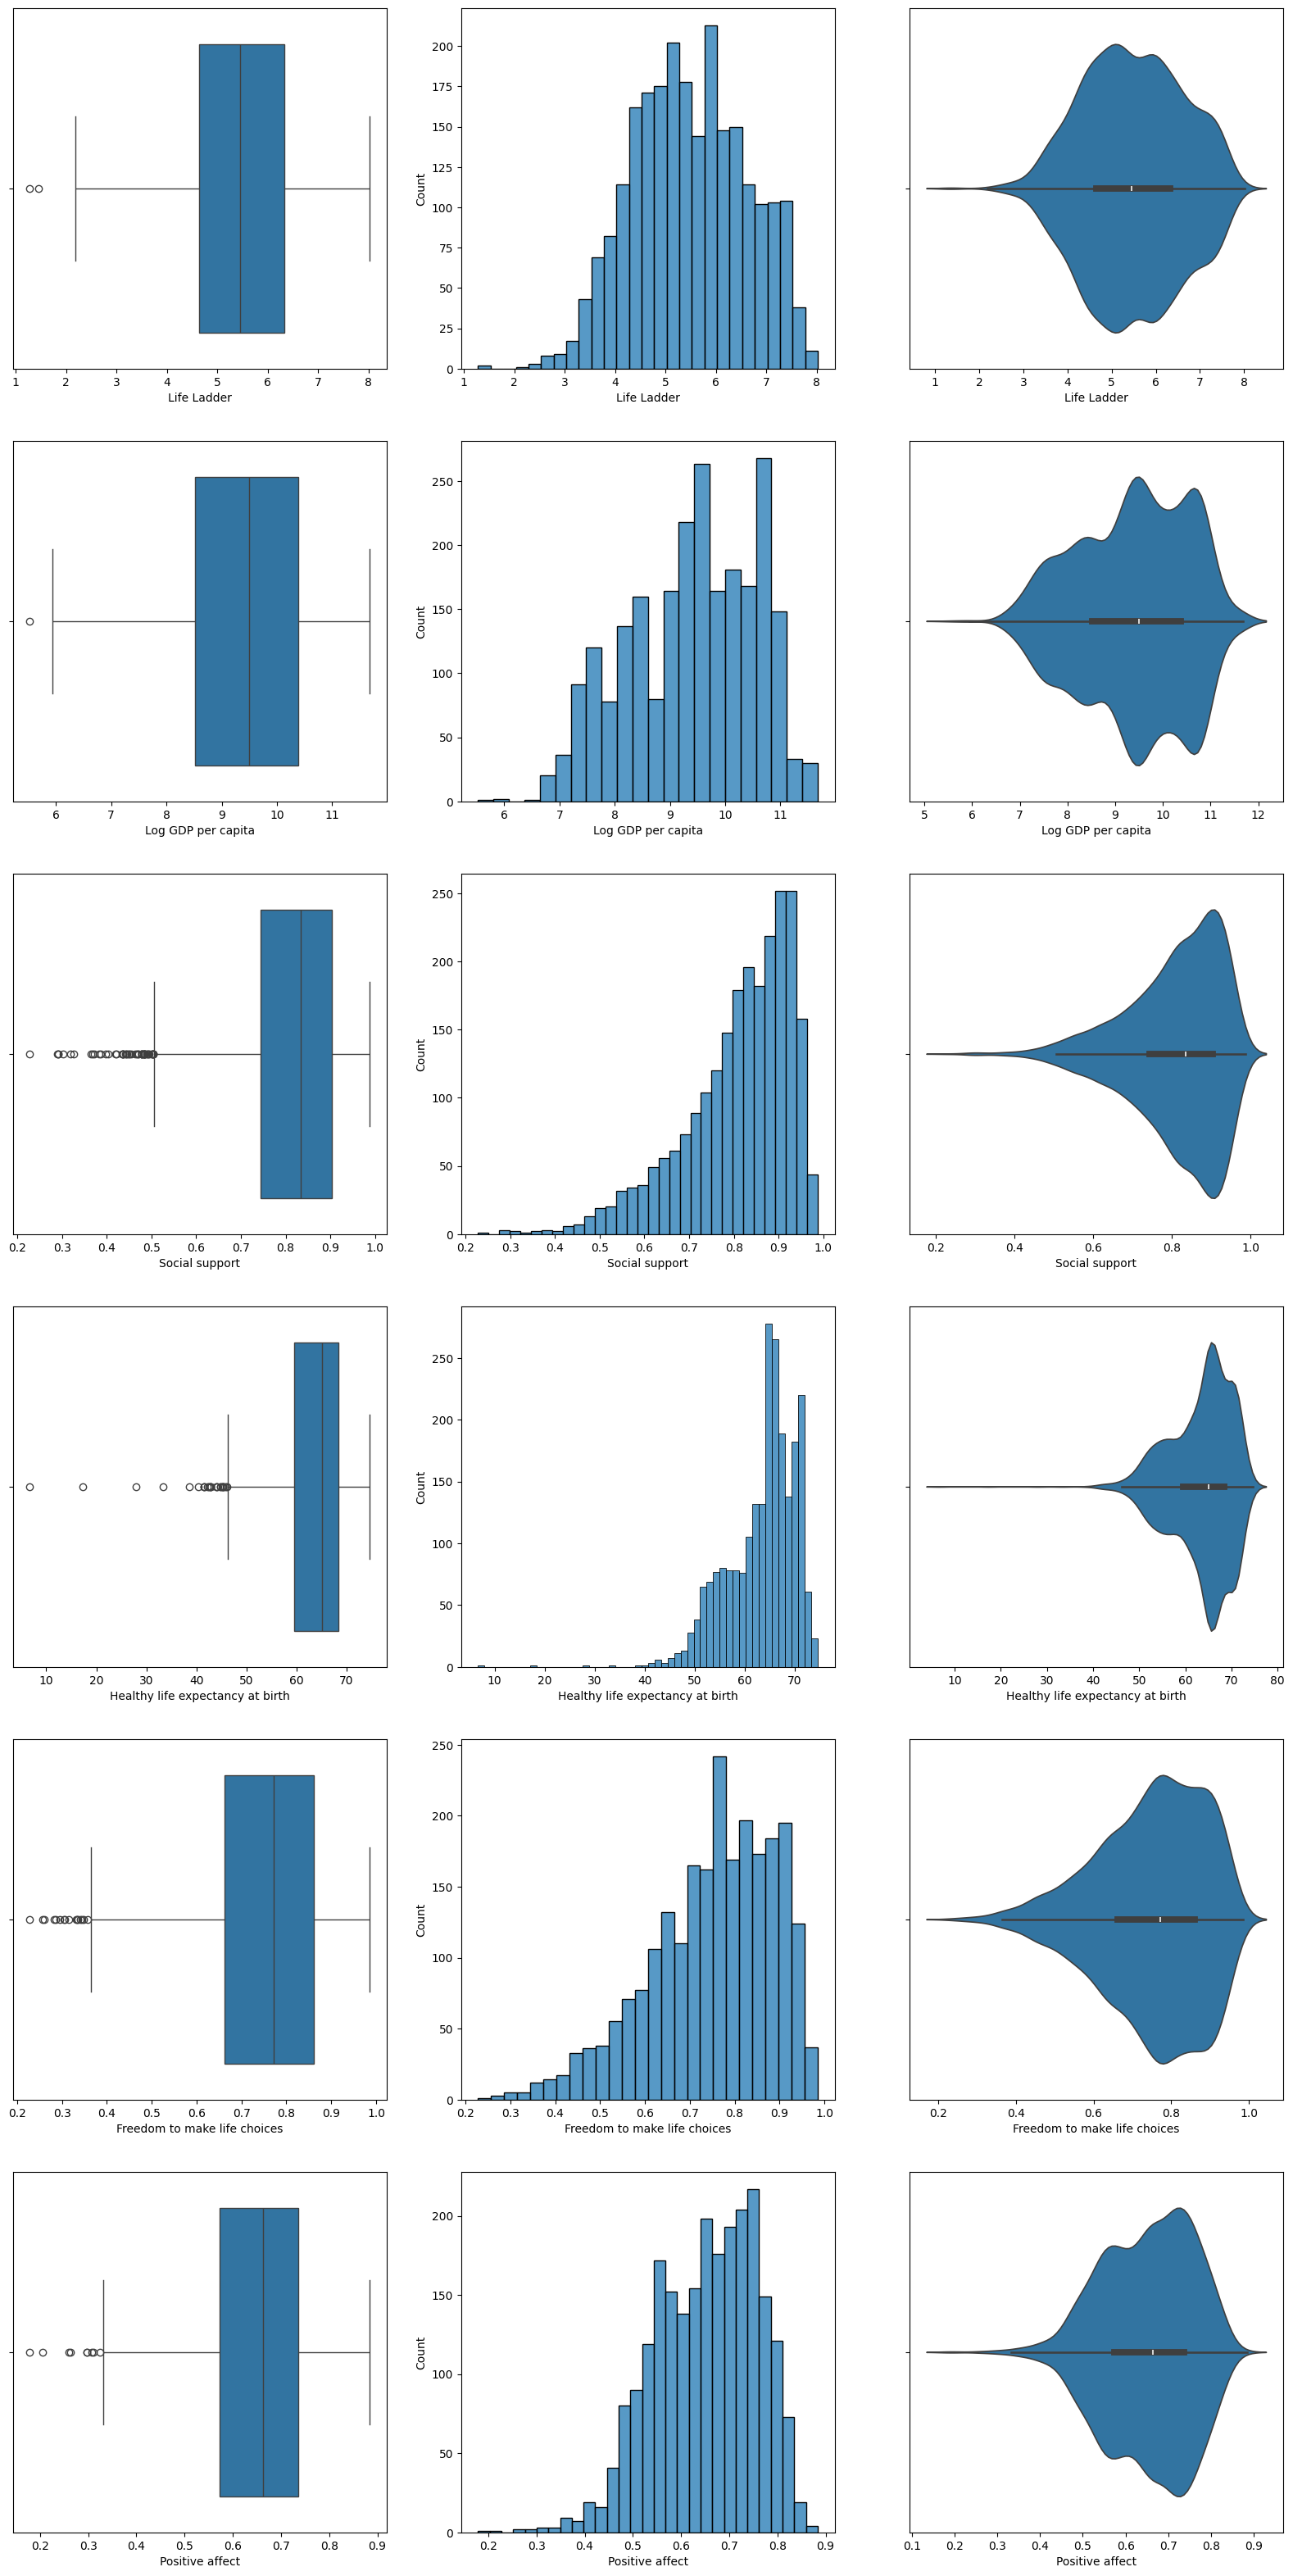

In [12]:
from matplotlib import pyplot as plt
f, axes = plt.subplots(6, 3, figsize=(20, 40))

count = 0
for var in cleanData2:
        sb.boxplot(data = cleanData2[var], orient = 'h', ax = axes[count,0])
        sb.histplot(data = cleanData2[var], ax = axes[count,1])
        sb.violinplot(data = cleanData2[var], orient = "h", ax = axes[count,2])
        count += 1

As seen in the respective box plots, there seems to be quite a number of outliers in 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', and 'Positive affect'. To determine if it is safe to delete the outliers, we need to retrieve the count of outliers. 

In [13]:
import pandas as pd
import numpy as np

# Function to calculate the number of outliers using the IQR method for each column
def calculate_outliers(df):
    outliers_count = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers_count[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return outliers_count

# Calculate outliers for all numerical columns in the dataframe
outliers_count = calculate_outliers(cleanData2)

print(outliers_count)

{'Life Ladder': 2, 'Log GDP per capita': 1, 'Social support': 50, 'Healthy life expectancy at birth': 27, 'Freedom to make life choices': 16, 'Positive affect': 9}


Since the number of outliers is only a small proportion of the dataset in the variables respectively, it is safe for us to remove this outliers without affecting distribution significantly.

In [14]:
# Define a function to detect and remove outliers using IQR

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out 

# Apply the function to cleanData2
cleanData3 = remove_outliers(cleanData2)

# Display the shape of the original and cleaned dataframes to compare the number of rows (observations) removed
cleanData2.shape, cleanData3.shape

((2363, 6), (2274, 6))

The sum of all the outliers of individual variables is 105, but there is only a reduction of 89 rows from cleanData2 to cleanData3. This does not imply any error as some of the outliers of individual variable may occur in the same row. 

Essentially, the difference of 89 rows from cleanData2 to cleandata3 means that the outliers have already been removed. 
 

# Machine Learning (Linear Regression) 

## Multi-Variate Linear Regression: 

Intercept 	: b =  [-4.23110236]
Coefficients 	: a =  [[0.35608468 2.10286193 0.03741447 1.05125872 2.27897267]]


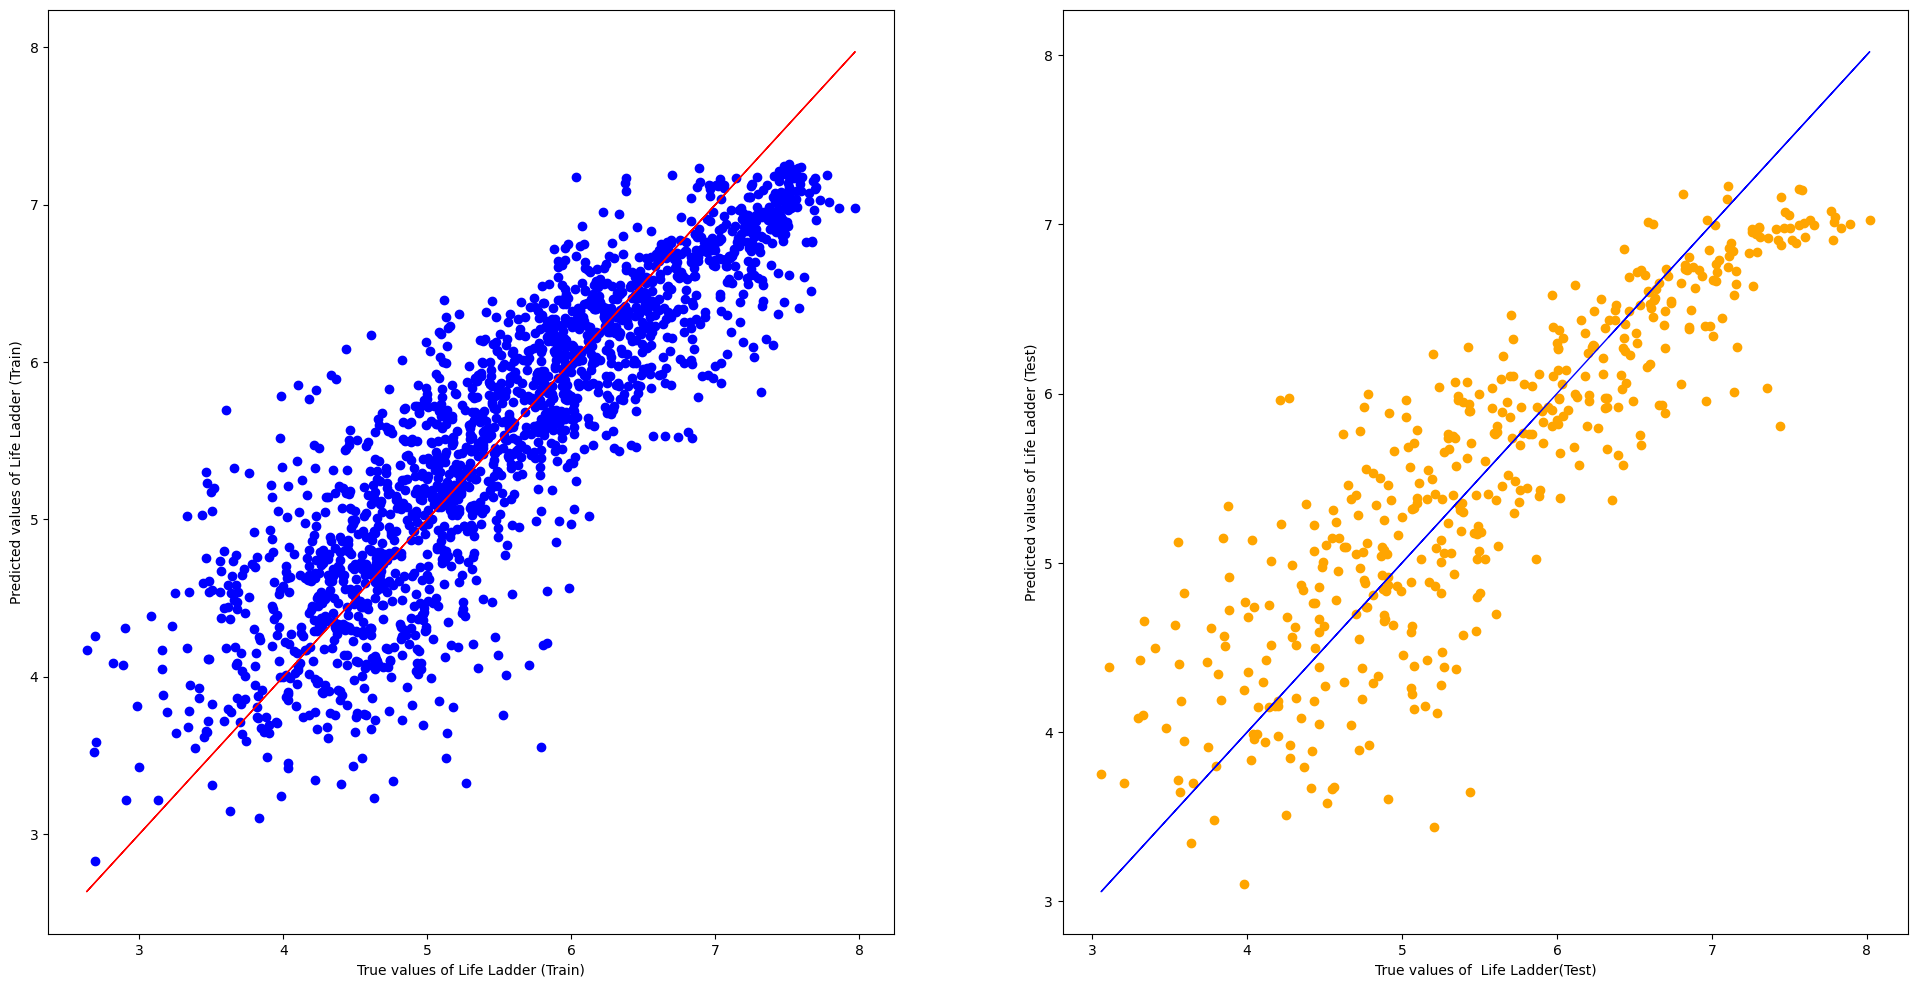

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

y = pd.DataFrame(cleanData3['Life Ladder'])
x = pd.DataFrame(cleanData3[['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect']])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 50)

from sklearn.linear_model import LinearRegression
import seaborn as sns

linreg = LinearRegression()
linreg.fit(x_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, linewidth = 1, color = "red")
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test, y_test_pred, color = "orange")
axes[1].plot(y_test, y_test, linewidth = 1, color = "blue")
axes[1].set_xlabel("True values of  Life Ladder(Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()

When looking at the Goodness of fit of model for both the Train Dataset and Test Dataset, we can see that the shape for both graphs are very similar. Thus, the data shows that the model is well trained and we can proceed with uni-variate regression to predict which variable is the most significant.

## Uni-Variate Linear Regression

### Log GDP per capita and Life Ladder 

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y1 = pd.DataFrame(cleanData3['Life Ladder'])
x1 = pd.DataFrame(cleanData3[['Log GDP per capita']])
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size = 0.2,random_state = 50 )

print("Train Set :", x_train1.shape, y_train1.shape)
print("Test Set  :", x_test1.shape, y_test1.shape)

Train Set : (1819, 1) (1819, 1)
Test Set  : (455, 1) (455, 1)


Intercept 	: b =  [-1.5605112]
Coefficients 	: a =  [[0.75064692]]


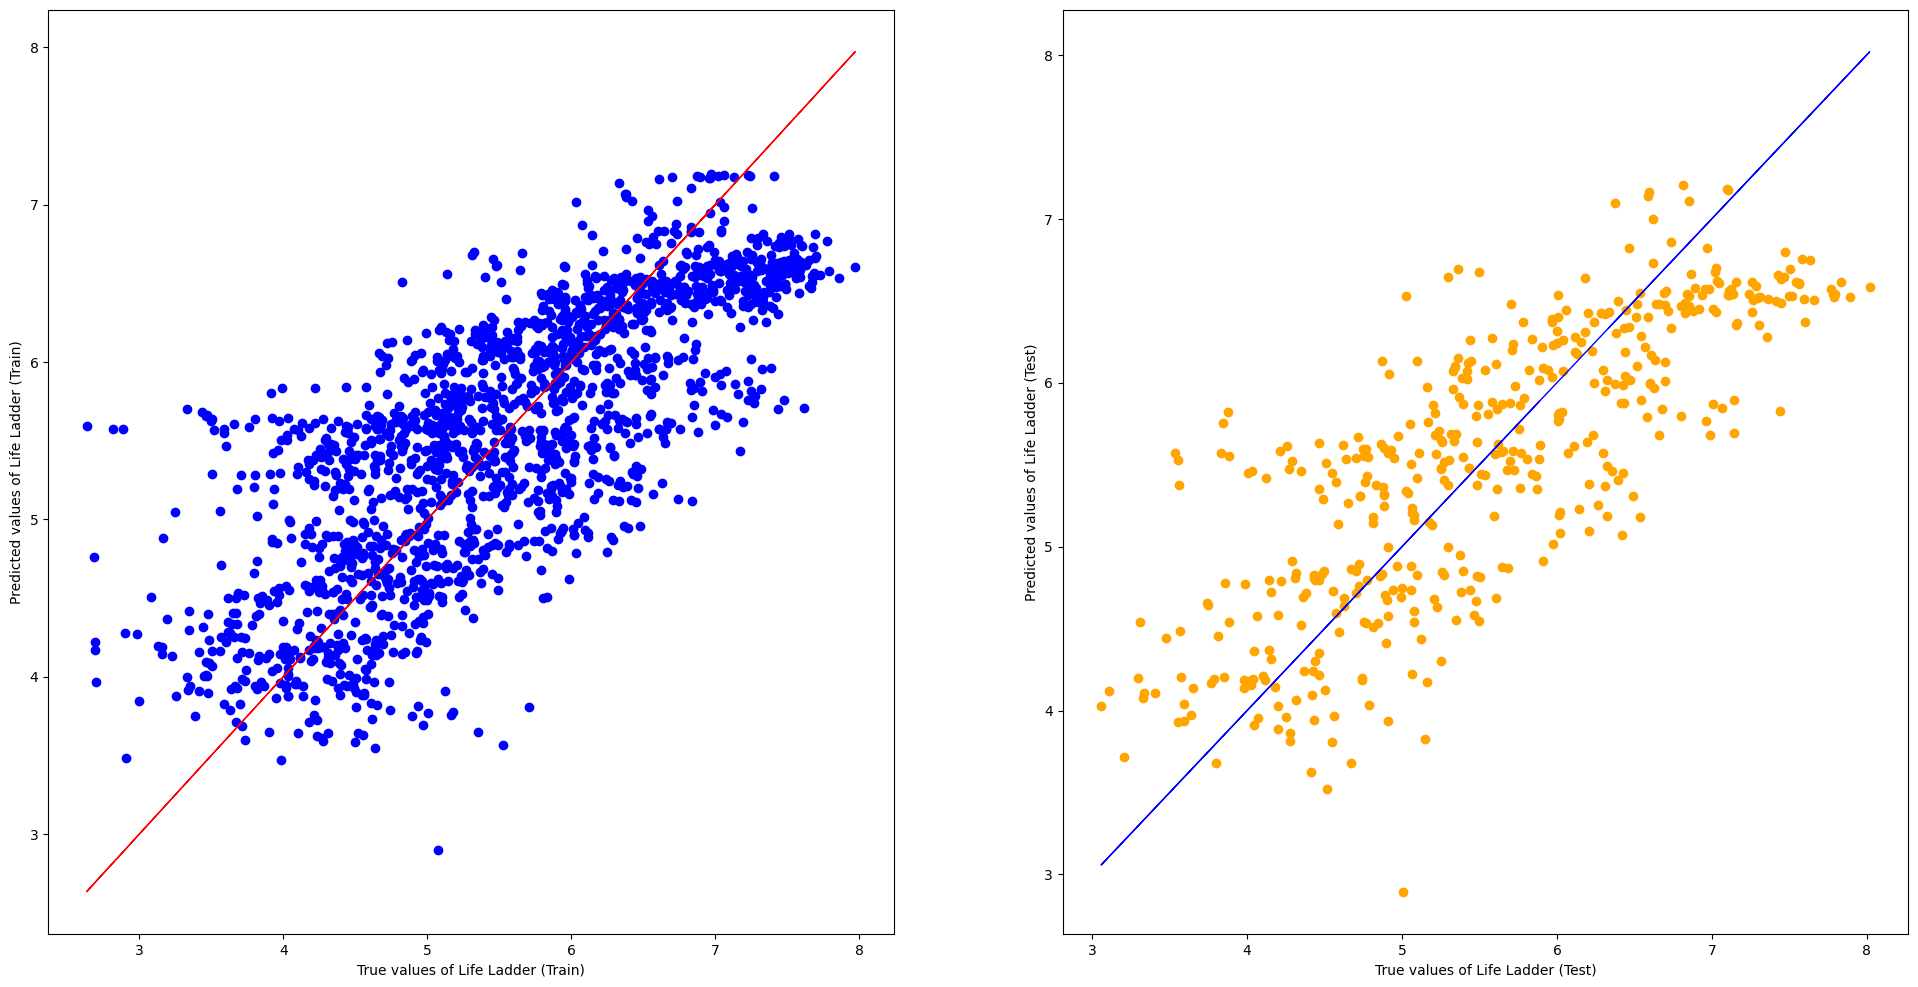

In [17]:
from sklearn.linear_model import LinearRegression

linreg1 = LinearRegression()
linreg1.fit(x_train1, y_train1)

y_train_pred1 = linreg1.predict(x_train1)
y_test_pred1 = linreg1.predict(x_test1)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg1.intercept_)
print('Coefficients \t: a = ', linreg1.coef_)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train1, y_train_pred1, color = "blue")
axes[0].plot(y_train1, y_train1, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test1, y_test_pred1, color = "orange")
axes[1].plot(y_test1, y_test1, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()

### Social Support and Life Ladder

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y2 = pd.DataFrame(cleanData3['Life Ladder'])
x2 = pd.DataFrame(cleanData3[['Social support']])
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size = 0.2,random_state = 50 )

print("Train Set :", x_train2.shape, y_train2.shape)
print("Test Set  :", x_test2.shape, y_test2.shape)

Train Set : (1819, 1) (1819, 1)
Test Set  : (455, 1) (455, 1)


Intercept 	: b =  [-0.33236721]
Coefficients 	: a =  [[7.17473952]]


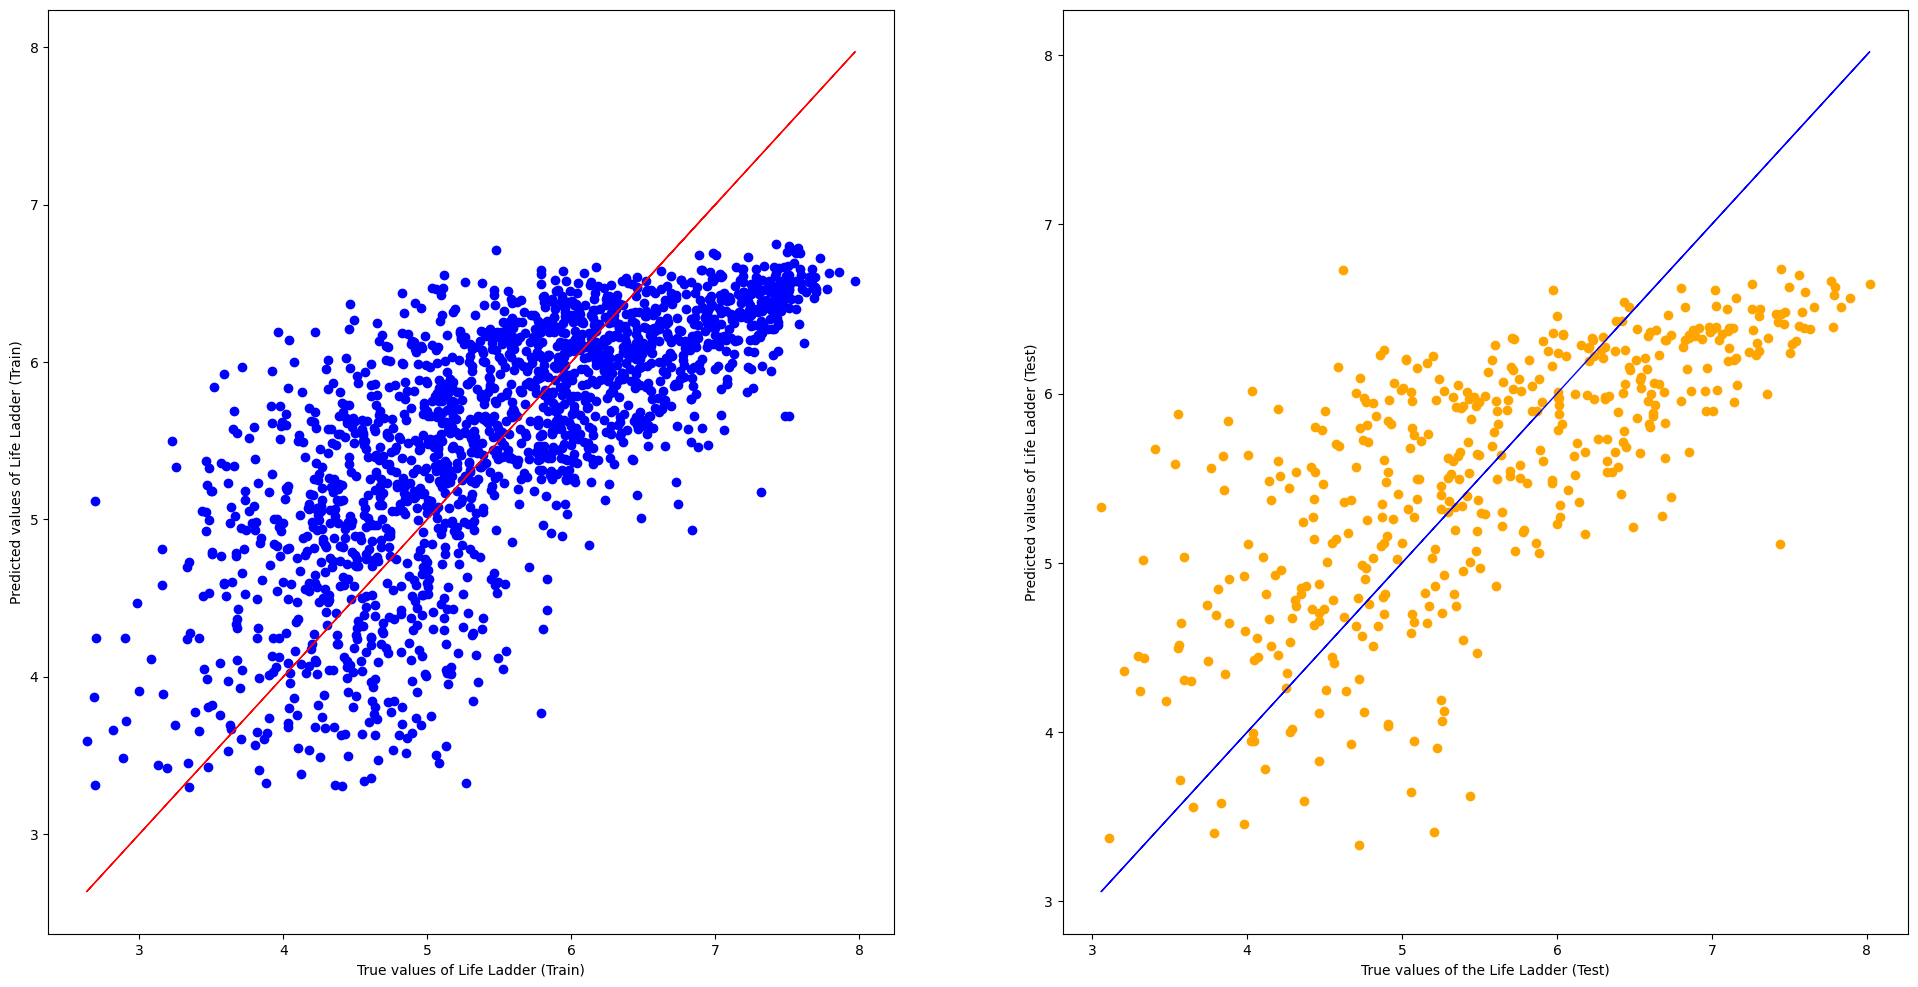

In [19]:
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()
linreg2.fit(x_train2, y_train2)

y_train_pred2 = linreg2.predict(x_train2)
y_test_pred2 = linreg2.predict(x_test2)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg2.intercept_)
print('Coefficients \t: a = ', linreg2.coef_)
# Regression: y = a * x + b
x_line2 = x_train2
y_line2 = linreg2.coef_ * x_train2 + linreg2.intercept_ 

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train2, y_train_pred2, color = "blue")
axes[0].plot(y_train2, y_train2, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test2, y_test_pred2, color = "orange")
axes[1].plot(y_test2, y_test2, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of the Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()

For social support, we can see that the Explained Variance (R^2) and Mean Squared Error (MSE) for both datasets are very similar. Thus, the data shows that the model is well trained

### Healthy life expectancy at Birth 

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y3 = pd.DataFrame(cleanData3['Life Ladder'])
x3 = pd.DataFrame(cleanData3[['Healthy life expectancy at birth']])
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size = 0.2,random_state = 50 )

print("Train Set :", x_train3.shape, y_train3.shape)
print("Test Set  :", x_test3.shape, y_test3.shape)

Train Set : (1819, 1) (1819, 1)
Test Set  : (455, 1) (455, 1)


Intercept 	: b =  [-2.60342494]
Coefficients 	: a =  [[0.12743208]]


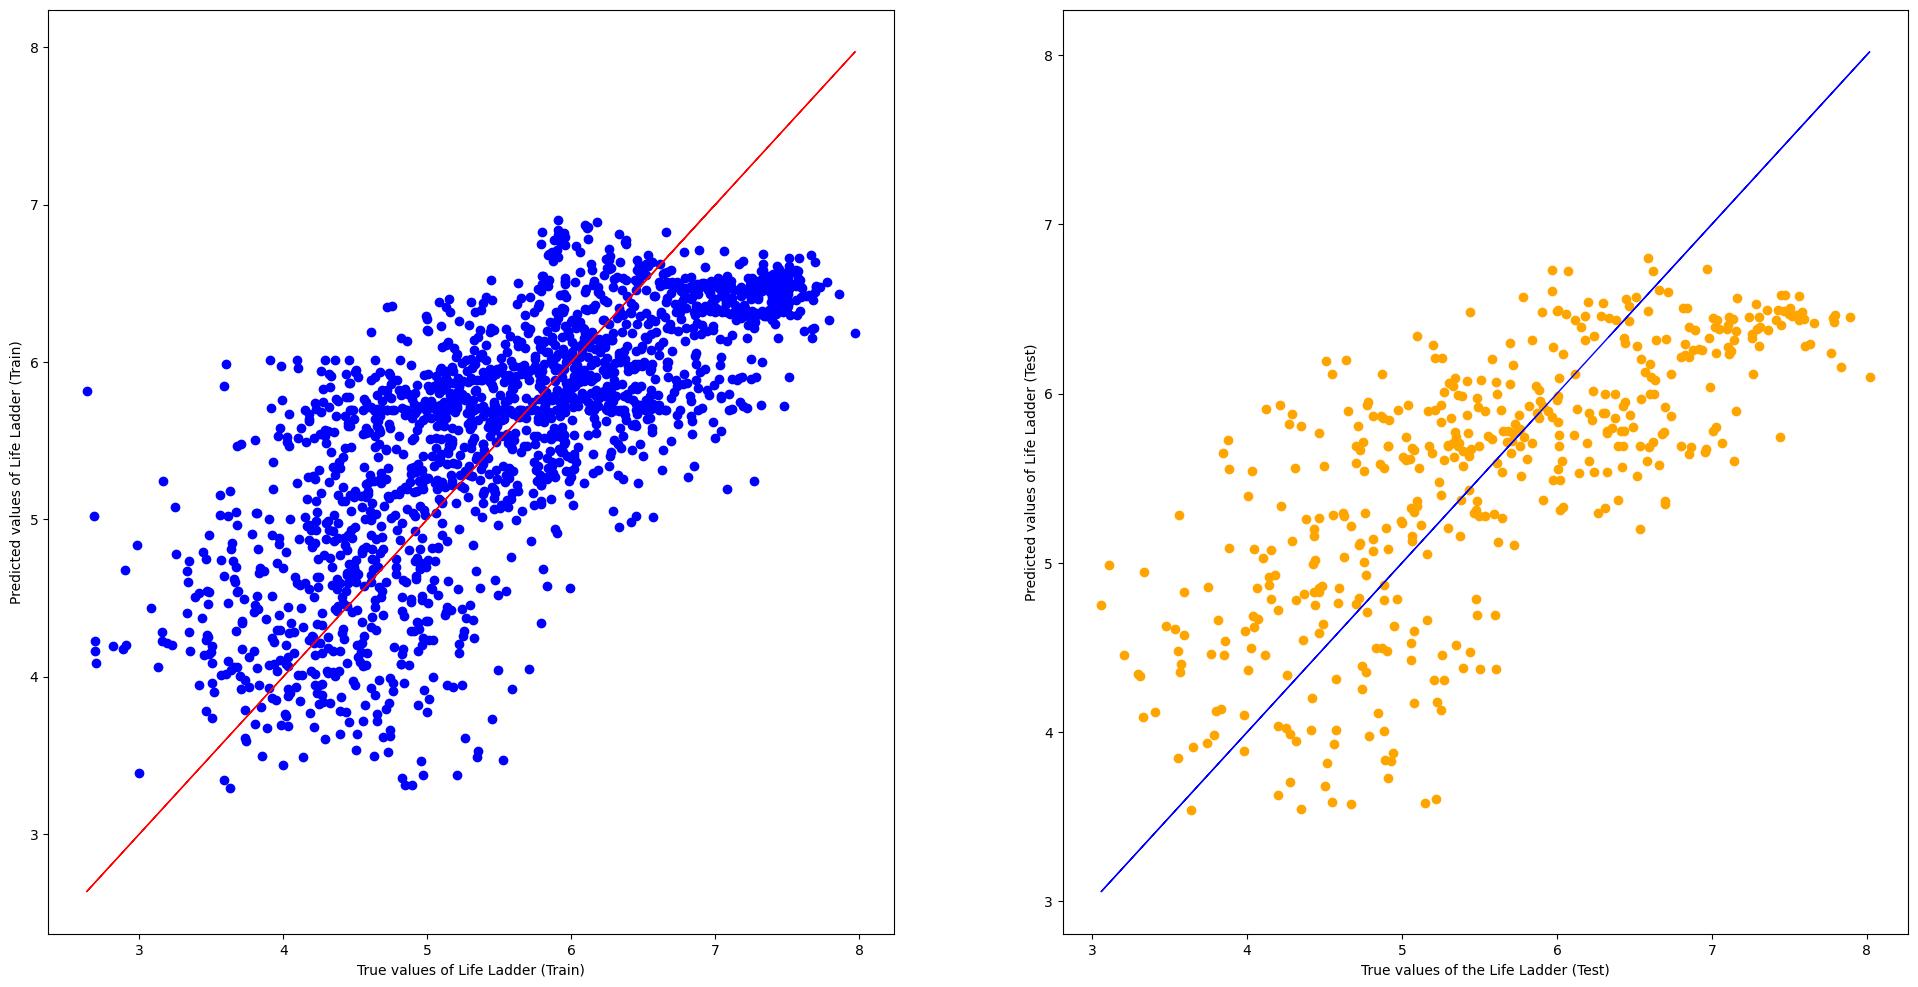

In [21]:
from sklearn.linear_model import LinearRegression
linreg3 = LinearRegression()
linreg3.fit(x_train3, y_train3)

y_train_pred3 = linreg3.predict(x_train3)
y_test_pred3 = linreg3.predict(x_test3)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg3.intercept_)
print('Coefficients \t: a = ', linreg3.coef_)

# Regression: y = a * x + b
x_line3 = x_train3
y_line3 = linreg3.coef_ * x_train3 + linreg3.intercept_ 

#plot regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train3, y_train_pred3, color = "blue")
axes[0].plot(y_train3, y_train3, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test3, y_test_pred3, color = "orange")
axes[1].plot(y_test3, y_test3, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of the Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()

For health expectancy at birth, we can see that the Explained Variance (R^2) and Mean Squared Error (MSE) for both datasets are very similar. Thus, the data shows that the model is well trained

### Freedom to make life choices and Life Ladder

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y4 = pd.DataFrame(cleanData3['Life Ladder'])
x4 = pd.DataFrame(cleanData3[['Freedom to make life choices']])
x_train4,x_test4,y_train4,y_test4 = train_test_split(x4,y4,test_size = 0.2,random_state = 50)
print("Train Set :", x_train4.shape, y_train4.shape)
print("Test Set  :", x_test4.shape, y_test4.shape)

Train Set : (1819, 1) (1819, 1)
Test Set  : (455, 1) (455, 1)


Intercept 	: b =  [2.24052693]
Coefficients 	: a =  [[4.35686425]]


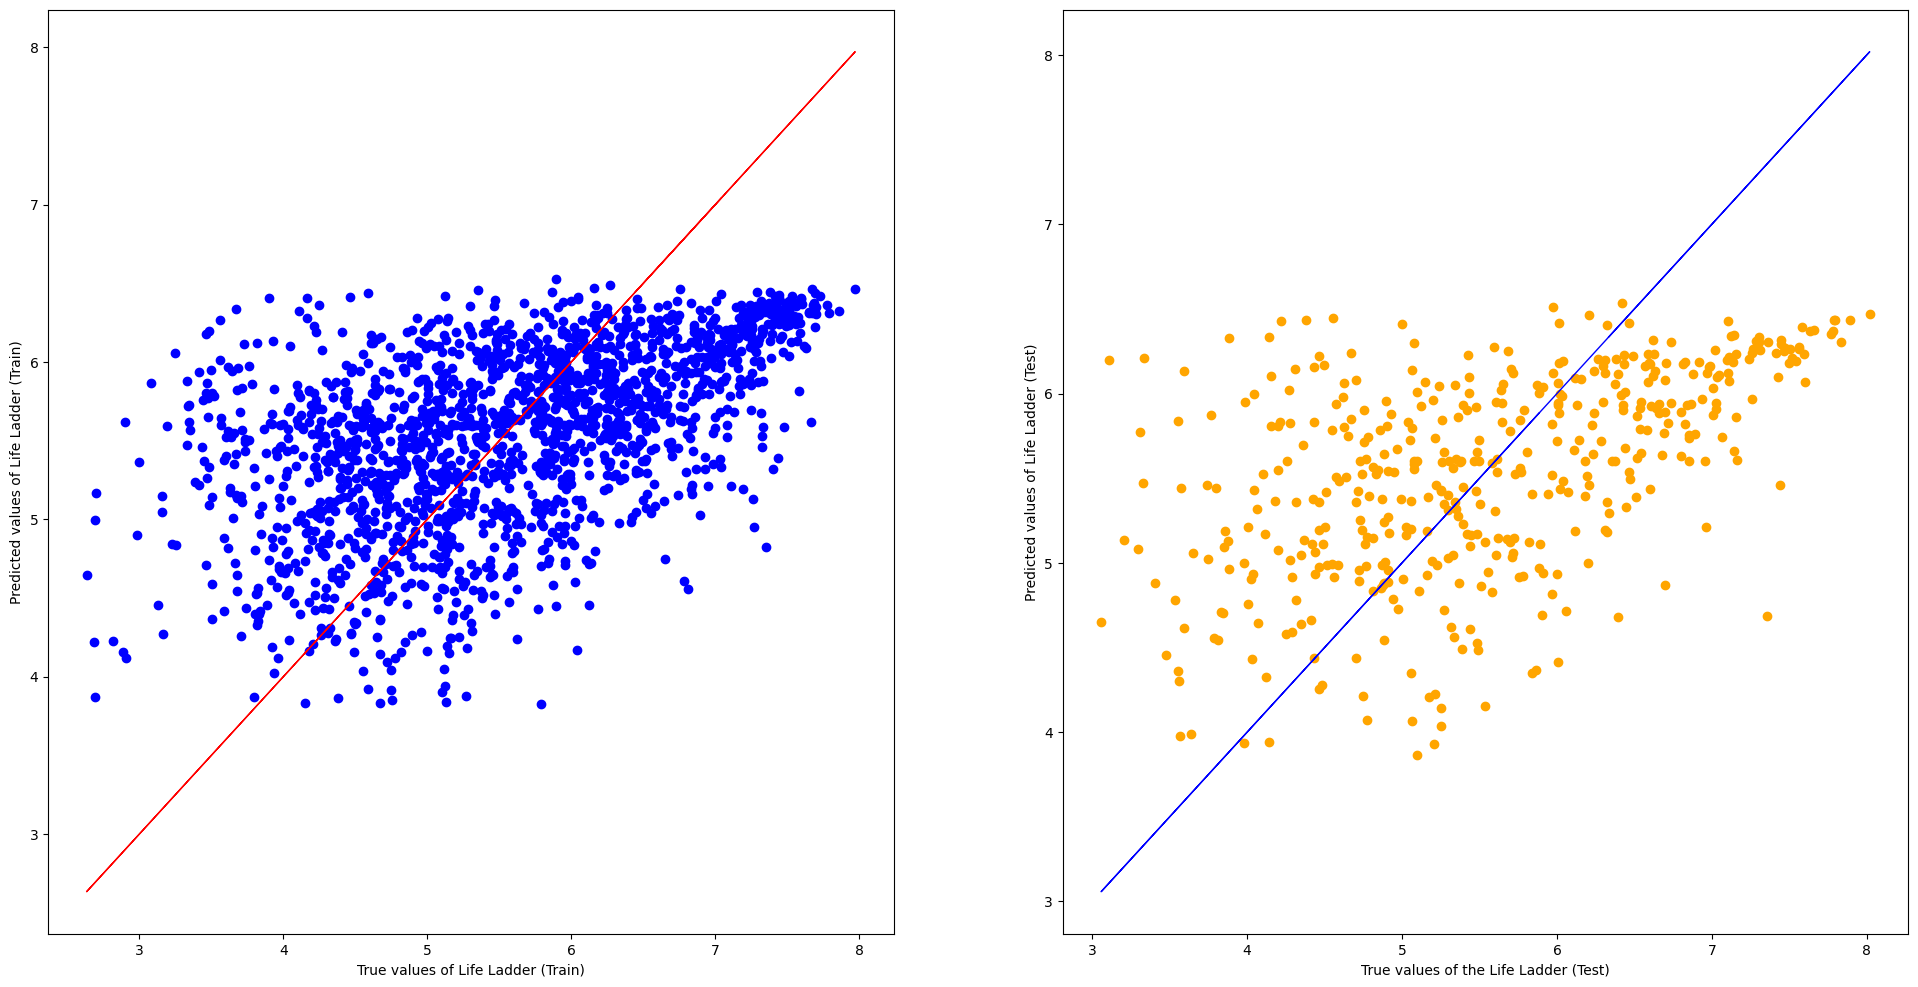

In [23]:
from sklearn.linear_model import LinearRegression
linreg4 = LinearRegression()
linreg4.fit(x_train4, y_train4)


y_train_pred4 = linreg4.predict(x_train4)
y_test_pred4 = linreg4.predict(x_test4)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg4.intercept_)
print('Coefficients \t: a = ', linreg4.coef_)
# Regression: y = a * x + b
x_line4 = x_train4
y_line4 = linreg4.coef_ * x_train4 + linreg4.intercept_ 

#plot regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train4, y_train_pred4, color = "blue")
axes[0].plot(y_train4, y_train4, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test4, y_test_pred4, color = "orange")
axes[1].plot(y_test4, y_test4, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of the Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()

For freedom to make life choices, we can see that the Explained Variance (R^2) and Mean Squared Error (MSE) for both datasets are very similar. Thus, the data shows that the model is well trained

### Positive affect and Life Ladder

In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y5 = pd.DataFrame(cleanData3['Life Ladder'])
x5 = pd.DataFrame(cleanData3[['Positive affect']])
x_train5,x_test5,y_train5,y_test5 = train_test_split(x5,y5,test_size = 0.2,random_state = 50 )

print("Train Set :", x_train5.shape, y_train5.shape)
print("Test Set  :", x_test5.shape, y_test5.shape)

Train Set : (1819, 1) (1819, 1)
Test Set  : (455, 1) (455, 1)


Intercept 	: b =  [2.17265261]
Coefficients 	: a =  [[5.14027831]]


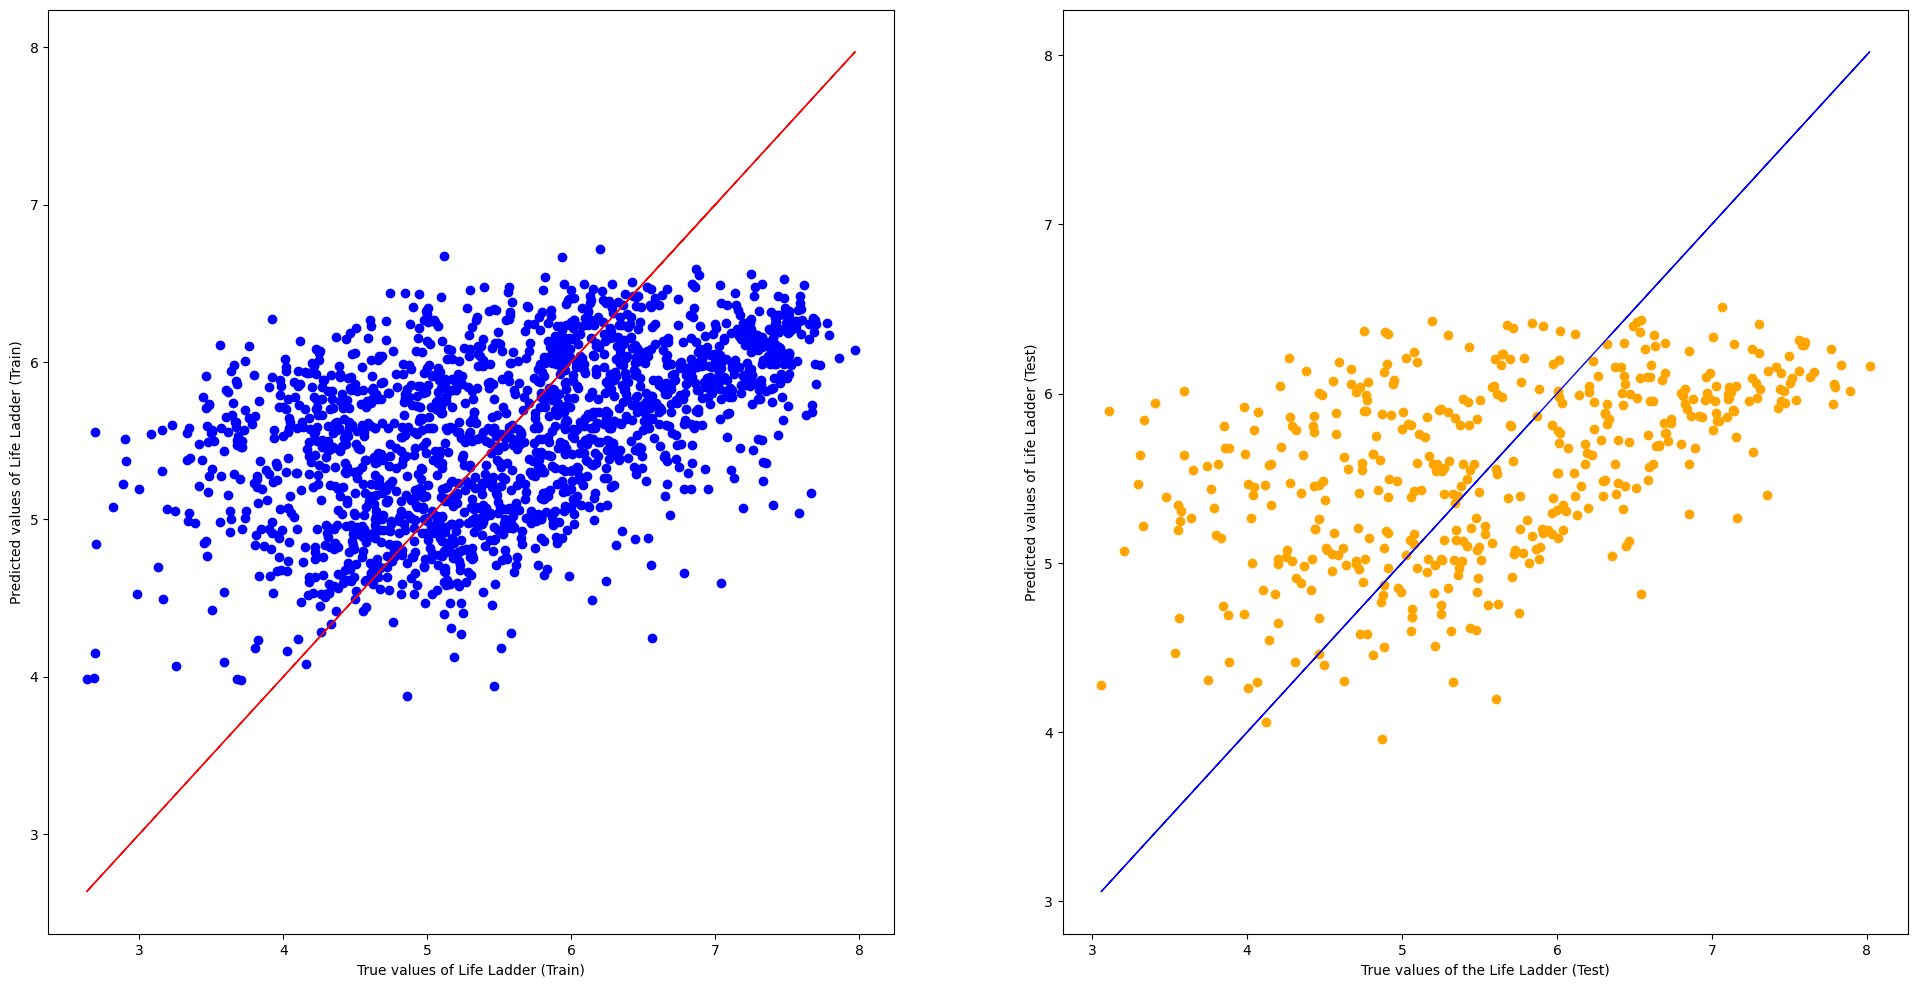

In [25]:
from sklearn.linear_model import LinearRegression
linreg5 = LinearRegression()
linreg5.fit(x_train5, y_train5)


y_train_pred5 = linreg5.predict(x_train5)
y_test_pred5 = linreg5.predict(x_test5)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg5.intercept_)
print('Coefficients \t: a = ', linreg5.coef_)
# Regression: y = a * x + b
x_line5 = x_train5
y_line5 = linreg5.coef_ * x_train5 + linreg5.intercept_ 

#plot regression line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train4, y_train_pred5, color = "blue")
axes[0].plot(y_train5, y_train5, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test5, y_test_pred5, color = "orange")
axes[1].plot(y_test5, y_test5, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of the Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()



For Positive affect, we can see that the Explained Variance (R^2) and Mean Squared Error (MSE) for both datasets are very similar. Thus, the data shows that the model is well trained

### Goodness of Fit for all the models.

In [26]:
import pandas as pd
from sklearn.metrics import explained_variance_score, mean_squared_error

# Initialize an empty list to store the goodness of fit statistics
summary = []

# List of models, train data, and test data
models = [(linreg1, x_train1, y_train1, x_test1, y_test1),
          (linreg2, x_train2, y_train2, x_test2, y_test2),
          (linreg3, x_train3, y_train3, x_test3, y_test3),
          (linreg4, x_train4, y_train4, x_test4, y_test4),
          (linreg5, x_train5, y_train5, x_test5, y_test5)]
# Name of variables
variables = ['Log GDP per Capita', 'Social Support', 'Healthy Life Expectancy at Birth', 'Freedom to make life choices', 'Positive affect']

# Go through each model and calculate the goodness of fit statistics
for i, (model, x_train, y_train, x_test, y_test) in enumerate(models):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Compile the statistics
    stats = {
        'Variables': variables[i],
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Explained Variance (Train)': explained_variance_score(y_train, y_train_pred),
        'Explained Variance (Test)': explained_variance_score(y_test, y_test_pred)
    }
    
    # Append the stats to the summary list
    summary.append(stats)

# Convert the list of dictionaries to a pandas DataFrame
summary_df = pd.DataFrame(summary)

# Set display options to show more columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Display the summary table
print(summary_df)

                          Variables  Train MSE  Test MSE  Explained Variance (Train)  Explained Variance (Test)
0                Log GDP per Capita   0.480089  0.464178                    0.591260                   0.624184
1                    Social Support   0.572520  0.610834                    0.512567                   0.504436
2  Healthy Life Expectancy at Birth   0.553663  0.590492                    0.528621                   0.522138
3      Freedom to make life choices   0.856830  0.904044                    0.270510                   0.266603
4                   Positive affect   0.896869  0.947334                    0.236422                   0.231479


From the results of Table, we can see that the following variables has the following explained variance (from best to worst)

1.  Log GDP per capita : 0.624184

2. Healthy Life Expectancy at Birth : 0.522138

3. Social Support : 0.504436

4. Freedom to make life choices: 0.266603

5. Positive affect: 0.231479

We can also see that the following variables has the following MSE (from best to worst)

1.  Log GDP per capita: 0.464178

2. Healthy Life Expectancy at Birth: : 0.590492

3. Social Support: 0.572520

4. Freedom to make life choices:  0.904044

5. Positive affect: 0.947334

Based on the Explained Variance and the MSE, the following variables are most likely to affect the response variable (Life Ladder)

1. Log GDP per capita

2. Healthy Life Expectancy at Birth

3. Social Support

4. Freedom to make life choices

5. Positive affect

We observe that the Log GDP per capita, Healthy Life Expectancy at Birth, and Social support are most likely to play a role in the response variables (Life Ladder), due to their rankings in MSE and Therefore, we have decided that we will isolate these 3 variables to see if they will help improve our prediction. We will hence do multi-variate regression using these 3 variables in the next model.

## Multi-variate Linear regression (3 Var)

We are trying to assess if the regression model is better after removing 'F

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

y6 = pd.DataFrame(cleanData3['Life Ladder'])
x6 = pd.DataFrame(cleanData3[['Log GDP per capita','Social support','Healthy life expectancy at birth']])
x_train6,x_test6,y_train6,y_test6 = train_test_split(x6,y6,test_size = 0.2, random_state = 50)

print("Train Set :", x_train6.shape, y_train6.shape)
print("Test Set  :", x_test6.shape, y_test6.shape)

Train Set : (1819, 3) (1819, 1)
Test Set  : (455, 3) (455, 1)


Intercept 	: b =  [-3.09523923]
Coefficients 	: a =  [[0.33045029 3.4318261  0.04225094]]


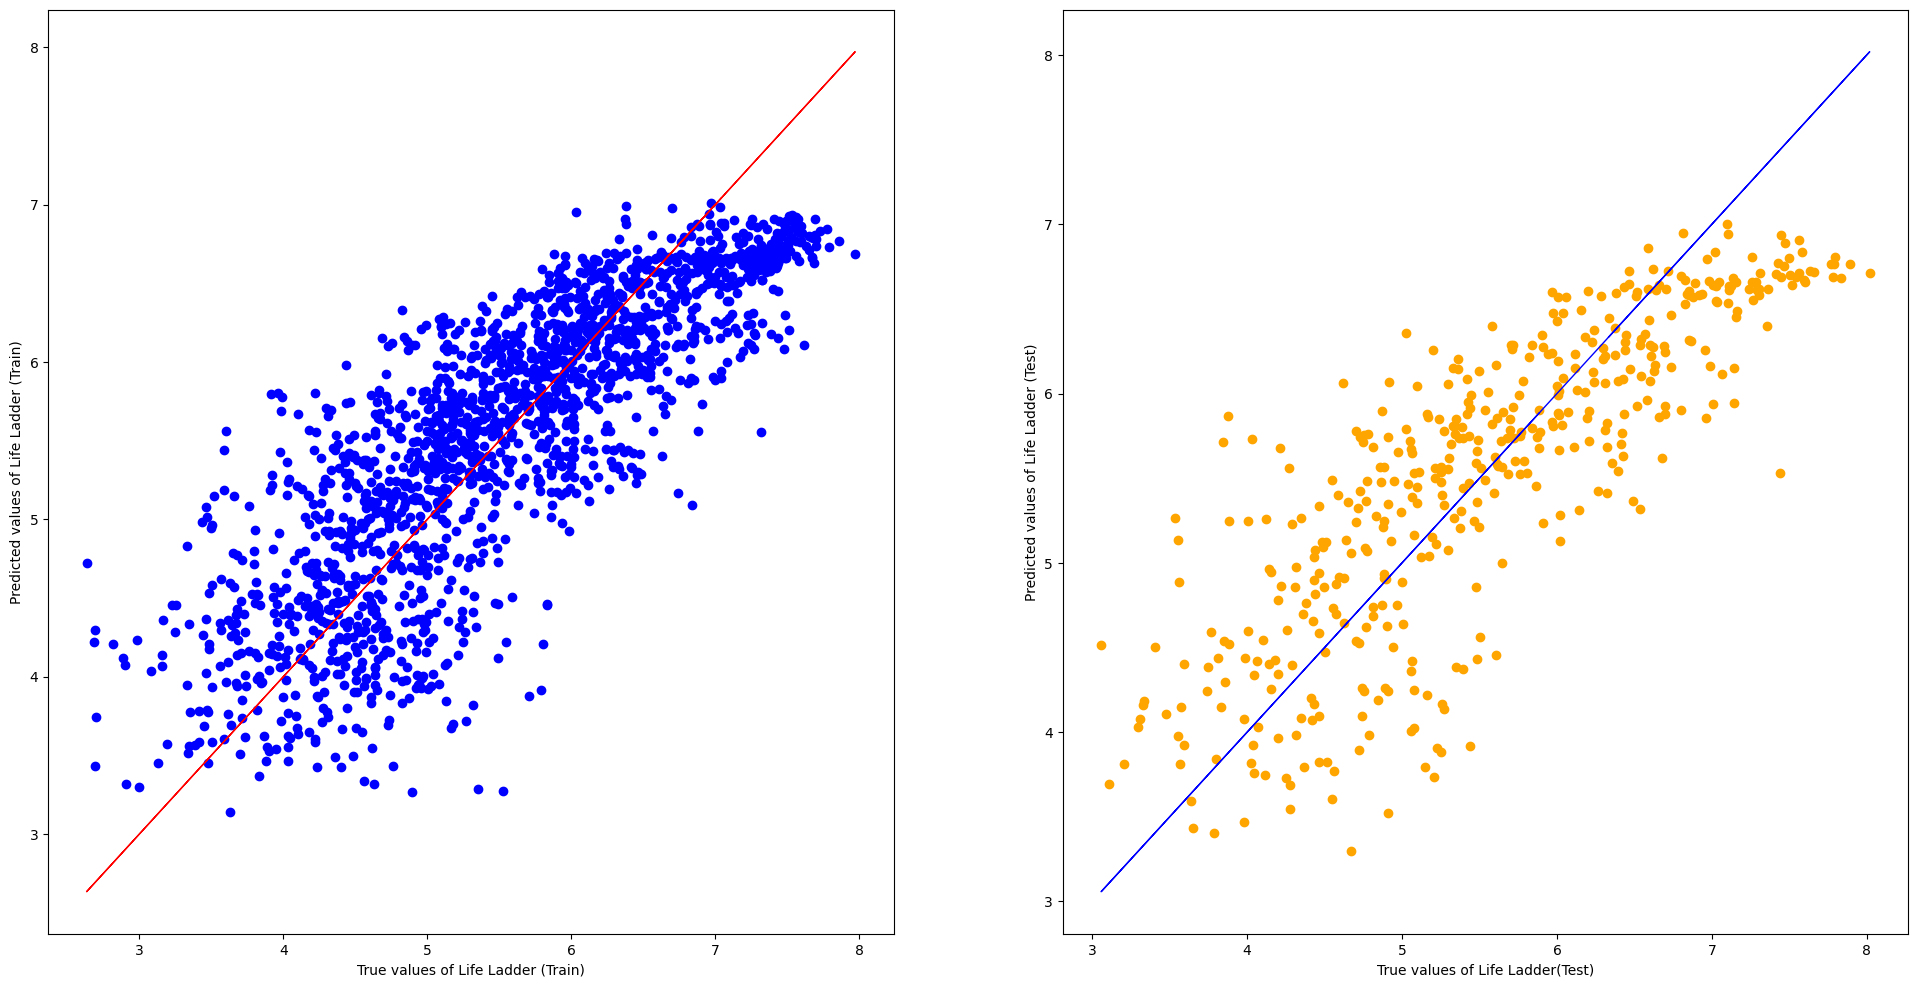

In [28]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

linreg6 = LinearRegression()
linreg6.fit(x_train6, y_train6)

print('Intercept \t: b = ', linreg6.intercept_)
print('Coefficients \t: a = ', linreg6.coef_)

y_train_pred6 = linreg6.predict(x_train6)
y_test_pred6 = linreg6.predict(x_test6)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train6, y_train_pred6, color = "blue")
axes[0].plot(y_train6, y_train6, linewidth = 1, color = "red")
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test6, y_test_pred6, color = "orange")
axes[1].plot(y_test6, y_test6, linewidth = 1, color = "blue")
axes[1].set_xlabel("True values of Life Ladder(Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()


In [29]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# Correcting the reference to training and testing data in calculation of statistics for Model 1
# to align with model training and evaluation steps.

# Calculate statistics for Model 1
model1_stats = {
    'Model': 'Multivariate Model 1 (5 Variables)',
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Explained Variance (Train)':  explained_variance_score(y_train, y_train_pred),
    'Explained Variance (Test)': explained_variance_score(y_test, y_test_pred),
}

# Calculate statistics for Model 2
model2_stats = {
    'Model': 'Multivarirate Model 2 (3 Variables)',
    'Train MSE': mean_squared_error(y_train6, y_train_pred6),
    'Test MSE': mean_squared_error(y_test6, y_test_pred6),
    'Explained Variance (Train)': explained_variance_score(y_train6, y_train_pred6),
    'Explained Variance (Test)': explained_variance_score(y_test6, y_test_pred6)
}

# Compile statistics into a DataFrame
summary_df = pd.DataFrame([model1_stats, model2_stats])

# Set display options to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Display the summary table
print(summary_df)

                                 Model  Train MSE  Test MSE  Explained Variance (Train)  Explained Variance (Test)
0   Multivariate Model 1 (5 Variables)   0.896869  0.947334                    0.236422                   0.231479
1  Multivarirate Model 2 (3 Variables)   0.375009  0.400203                    0.680724                   0.675885


Since removing the two variables did not improve the Test MSE and Explained Variance (Test) but instead made it worse, we have decided to keep the 5 variables instead when we are doing XGBoost to ensure max accuracy.

# Machine Learning (Others)

## XGBoost

XGBoost which stands for Extreme Gradient Boosting, is a machine learning model which utilizes gradient-boosted decision tree. It can be used for regression and classification problems. The gradient-boosted decision tree is similar to the Random Forest, where it combines multiple machine learning algorithms to obtain a better model. in XGBoost's case, it combine a single weak model with other weak models to make a single strong model. This allows for more accurate prediction of the model.

In [30]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Define the model
xgb_model = XGBRegressor()

# Define the parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.03, 0.06, 0.1]
}

# Data Splitting
y8 = pd.DataFrame(cleanData3['Life Ladder'])
x8 = cleanData3[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect']]
x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.2, random_state=50)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(x_train8, y_train8)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Train the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)
best_xgb_model.fit(x_train8, y_train8)

# Predictions
y_pred_train8 = best_xgb_model.predict(x_train8)
y_pred_test8  = best_xgb_model.predict(x_test8)

# Evaluation
mse_train8 = mean_squared_error(y_train8, y_pred_train8)
mse_test8 = mean_squared_error(y_test8, y_pred_test8)
explained_variance_train8 = explained_variance_score(y_train8, y_pred_train8)
explained_variance_test8 = explained_variance_score(y_test8, y_pred_test8)

{'Best Parameters': best_params, 'Best Score': best_score, 'Train MSE': mse_train8, 'Test MSE': mse_test8, 'Train Explained Variance': explained_variance_train8, 'Test Explained Variance': explained_variance_test8}

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'Best Parameters': {'learning_rate': 0.06,
  'max_depth': 7,
  'n_estimators': 100},
 'Best Score': 0.19955931694725185,
 'Train MSE': 0.0399605628845332,
 'Test MSE': 0.1794425669437191,
 'Train Explained Variance': 0.9659782722316911,
 'Test Explained Variance': 0.8544455060746174}

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor
import pandas as pd

# Assuming 'cleanData3' is your DataFrame and already defined above

# Split your dataset into features and target variable
y8 = pd.DataFrame(cleanData3['Life Ladder'])
x8 = cleanData3[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect']]

# Splitting the data into training and testing sets
x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.2, random_state=50)

# Define the model
xgb_model = XGBRegressor()

# Define the parameters for the grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.03, 0.06, 0.1],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Perform grid search
grid_search.fit(x_train8, y_train8)

# Extract best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Further split your training data to create a validation set for early stopping
X_train_final, X_val, y_train_final, y_val = train_test_split(x_train8, y_train8, test_size=0.25, random_state=50)
# Initialize the model with the best parameters
best_xgb_model = XGBRegressor(**best_params)

# Fit the model with early stopping
best_xgb_model.fit(X_train_final, y_train_final,
                   early_stopping_rounds=10,
                   eval_set=[(X_val, y_val)],
                   verbose=False)  # Change verbose to True if you wish to see the log

# Make predictions
y_pred_train = best_xgb_model.predict(x_train8)
y_pred_test = best_xgb_model.predict(x_test8)

# Calculate and print MSE for both train and test sets
train_mse = mean_squared_error(y_train8, y_pred_train)
test_mse = mean_squared_error(y_test8, y_pred_test)
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
/root/venv/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
Train MSE: 0.08402010753275967, Test MSE: 0.18955398971173873


After using grid search to test the different parameters in the training of XGboost, we found out that the best parameters are:

-  learning_rate : 0.03
- max_depth : 3
- n_estimators: 200

From the grid search, the best score is the highest evaluation metric achieved during the grid search process. Since we are maximising accuracy, the best score minimises the negative of accuracy, which is equivalent to maximising accuracy. 

Intercept 	: b =  [-4.23110236]
Coefficients 	: a =  [[0.35608468 2.10286193 0.03741447 1.05125872 2.27897267]]


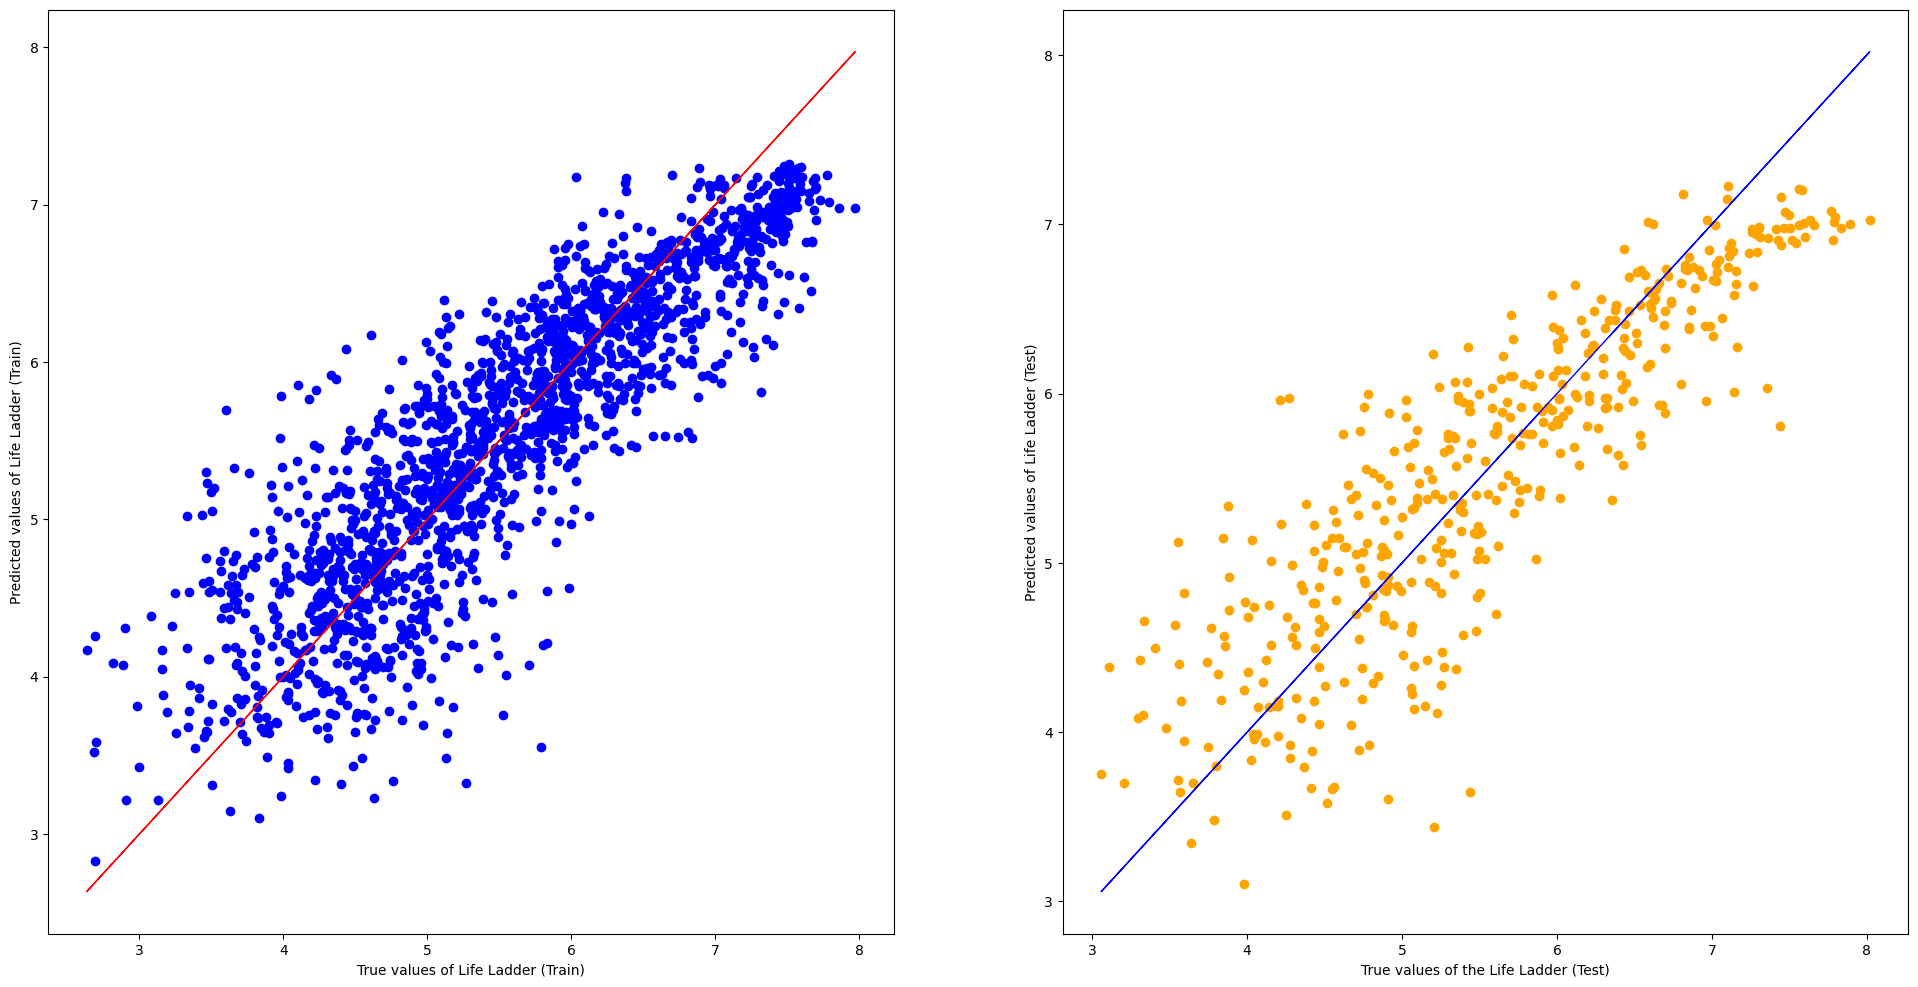

In [32]:
from sklearn.linear_model import LinearRegression
linreg8 = LinearRegression()
linreg8.fit(x_train8, y_train8)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg8.intercept_)
print('Coefficients \t: a = ', linreg8.coef_)

# Predictions
y_train_pred8 = linreg8.predict(x_train8)
y_test_pred8 = linreg8.predict(x_test8)

# Plot 45 line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train8, y_train_pred8, color = "blue")
axes[0].plot(y_train8, y_train8, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test8, y_test_pred8, color = "orange")
axes[1].plot(y_test8, y_test8, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of the Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()


## Tensor Flow 

Tensor Flow is a popular framework of machine learning and deep learning.
TensorFlow is used to define the flow of data in operation on a multidimensional array or Tensor.
  - Tensor is a multidimensional array
  - Flow is used to define the flow of data in operation.

Tensor Flow represents computation as computational graphs, where nodes represent mathematical operations and edges represents the flow of datas between the operations. 

This allows for efficient handling of complex computations and a better model for prediction.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
import tensorflow as tf
from tensorflow.keras import layers

# Define the inputs and output
x7 = cleanData3[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect']]
y7 = pd.DataFrame(cleanData3['Life Ladder'])

# Split the data into training and testing sets
x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size=0.2, random_state=50)

# Build the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train7.shape[1],)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train7, y_train7, epochs=300, validation_split=0.2, verbose=0)

# Predictions
y_train_pred7 = model.predict(x_train7)
y_test_pred7 = model.predict(x_test7)

# Evaluation
mse_train7 = mean_squared_error(y_train7, y_train_pred7)
mse_test7 = mean_squared_error(y_test7, y_test_pred7)
explained_variance_train7 = explained_variance_score(y_train7,  y_train_pred7)
explained_variance_test7 = explained_variance_score(y_test7,  y_test_pred7)

{'mse_train': mse_train8, 'mse_test': mse_test8, 'explained_variance_train': explained_variance_train8, 'explained_variance_test': explained_variance_test8}

2024-04-03 09:47:18.537679: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 09:47:18.557863: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 09:47:18.557892: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 09:47:18.557912: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 09:47:18.562272: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 09:47:18.562724: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

{'mse_train': 0.0399605628845332,
 'mse_test': 0.1794425669437191,
 'explained_variance_train': 0.9659782722316911,
 'explained_variance_test': 0.8544455060746174}

We started off simple with 1 hidden layers with 64 neurons to test out the results. Then we gradually increase the number of layers by 1 until the icrement results in a worse result. Eventually, we concluded that the best model is when 3 hidden layers and 128 neurons is used. 

Here are the reasons why we chose ReLU (Rectified Linear Unit) as our activation function:



1. Our output is non-negative

2. It deals with vanishing gradient problem

3. Simple, computationally efficient

Here are the reasons why we used Adam (Adaptive Moment Estimation) as our optimizer:

1. Robust and efficient

2. Adaptive learning rate 

Adam adjusts the learning rate for each weight in the model individually. This adaptive learning rate approach helps in handling the sparsity of data and the different scales of parameters

Intercept 	: b =  [-4.23110236]
Coefficients 	: a =  [[0.35608468 2.10286193 0.03741447 1.05125872 2.27897267]]


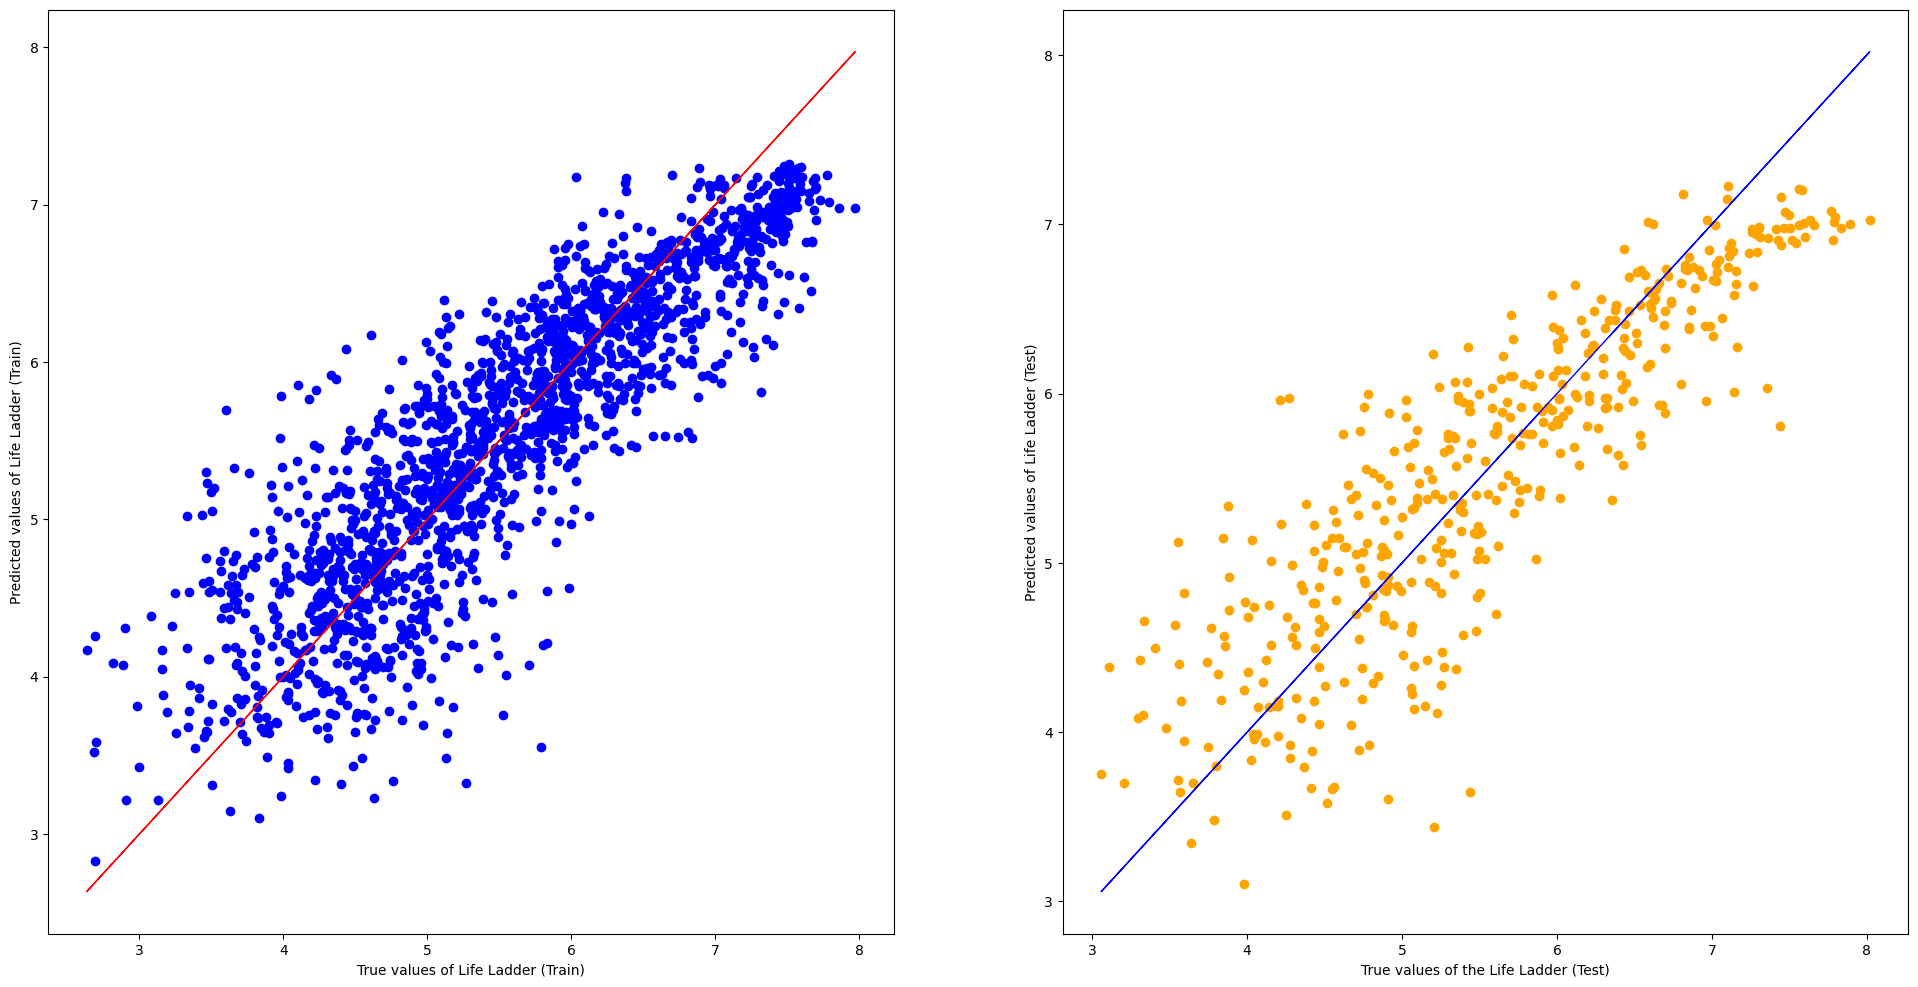

In [34]:
from sklearn.linear_model import LinearRegression
linreg7 = LinearRegression()
linreg7.fit(x_train7, y_train7)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg7.intercept_)
print('Coefficients \t: a = ', linreg7.coef_)

# Predictions
y_train_pred7 = linreg7.predict(x_train7)
y_test_pred7 = linreg7.predict(x_test7)

# Plot 45 line
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train7, y_train_pred7, color = "blue")
axes[0].plot(y_train7, y_train7, linewidth = 1, color = 'red')
axes[0].set_xlabel("True values of Life Ladder (Train)")
axes[0].set_ylabel("Predicted values of Life Ladder (Train)")
axes[1].scatter(y_test7, y_test_pred7, color = "orange")
axes[1].plot(y_test7, y_test7, linewidth = 1, color = 'Blue')
axes[1].set_xlabel("True values of the Life Ladder (Test)")
axes[1].set_ylabel("Predicted values of Life Ladder (Test)")
plt.show()


Since the Mean Squared Error (MSE) of training set is similar to the test set, the model is well trained. 

In [35]:
import pandas as pd
from sklearn.metrics import mean_squared_error, explained_variance_score

# Calculate statistics for Multivariate Model 1 
model1_stats = {
    'Model': 'Multivariate Model 1 (5 Variables)',
    'Train MSE': mean_squared_error(y_train, y_train_pred),
    'Test MSE': mean_squared_error(y_test, y_test_pred),
    'Train Explained Variance': explained_variance_score(y_train, y_train_pred),
    'Test Explained Variance': explained_variance_score(y_test, y_test_pred)
}

# Calculate statistics for TensorFlow
TensorFlow_stats = {
    'Model': 'TensorFlow',
    'Train MSE': mean_squared_error(y_train7, y_train_pred7),
    'Test MSE': mean_squared_error(y_test7, y_test_pred7),
    'Train Explained Variance': explained_variance_score(y_train7, y_train_pred7),
    'Test Explained Variance': explained_variance_score(y_test7, y_test_pred7)
}

# Calculate stats for XGBoost
XGBoost_stats = {
    'Model': 'XGBoost',
    'Train MSE': mean_squared_error(y_train8, y_pred_train8), # Ensure correct prediction variable is used
    'Test MSE': mean_squared_error(y_test8, y_pred_test8), # Ensure correct prediction variable is used
    'Train Explained Variance': explained_variance_score(y_train8, y_pred_train8),
    'Test Explained Variance': explained_variance_score(y_test8, y_pred_test8)
}

# Compile statistics into a DataFrame for easy comparison
summary_df = pd.DataFrame([model1_stats, TensorFlow_stats, XGBoost_stats])

# Display the summary table
print(summary_df)


                                Model  Train MSE  Test MSE  Train Explained Variance  Test Explained Variance
0  Multivariate Model 1 (5 Variables)   0.896869  0.947334                  0.236422                 0.231479
1                          TensorFlow   0.286592  0.297500                  0.756000                 0.758851
2                             XGBoost   0.039961  0.179443                  0.965978                 0.854446


Comparing all the learning models that we have utilised, XGBoost  the lowest for the Mean Squared error (Train), Mean Squared error (Test). A lower MSE for both training and testing datasets suggests that TensorFlow's predictions are very close to the actual values, indicating high accuracy and generalization capability of the model.

Furthermore, XGBoost has the highest Explained Variance (Train), and Explained Variance (Test). A higher explained variance indicates that the  Tensor Flow model captures more of the variability in the data, which is a good sign of fit. Hence, making it the most effective model to identify the underlying patterns

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=21ec7ec0-c8df-4e26-98a5-188b93e37c21' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>